In [30]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt 

In [31]:
# Reading the data 

applicant_data = pd.read_csv("C:\\Users\\lenovo\\OneDrive\\Desktop\\Reunion\\data\\applicant.csv")
loan_data = pd.read_csv("C:\\Users\\lenovo\\OneDrive\\Desktop\\Reunion\\data\\loan.csv")

In [32]:
# data merge
data = pd.merge(applicant_data, loan_data, on = "applicant_id")

In [33]:
data.columns

Index(['applicant_id', 'Primary_applicant_age_in_years', 'Gender',
       'Marital_status', 'Number_of_dependents', 'Housing',
       'Years_at_current_residence', 'Employment_status',
       'Has_been_employed_for_at_least', 'Has_been_employed_for_at_most',
       'Telephone', 'Foreign_worker', 'Savings_account_balance',
       'Balance_in_existing_bank_account_(lower_limit_of_bucket)',
       'Balance_in_existing_bank_account_(upper_limit_of_bucket)',
       'loan_application_id', 'Months_loan_taken_for', 'Purpose',
       'Principal_loan_amount', 'EMI_rate_in_percentage_of_disposable_income',
       'Property', 'Has_coapplicant', 'Has_guarantor', 'Other_EMI_plans',
       'Number_of_existing_loans_at_this_bank', 'Loan_history',
       'high_risk_applicant'],
      dtype='object')

In [34]:
cols=data.select_dtypes('object').columns
cat_cols=cols.tolist()

In [35]:
cat_cols=['Gender', 
          'Marital_status', 
          'Housing', 
          'Employment_status', 
          'Savings_account_balance', 
          'Property', 
          'Purpose',
          'high_Risk_applicant'
         ]

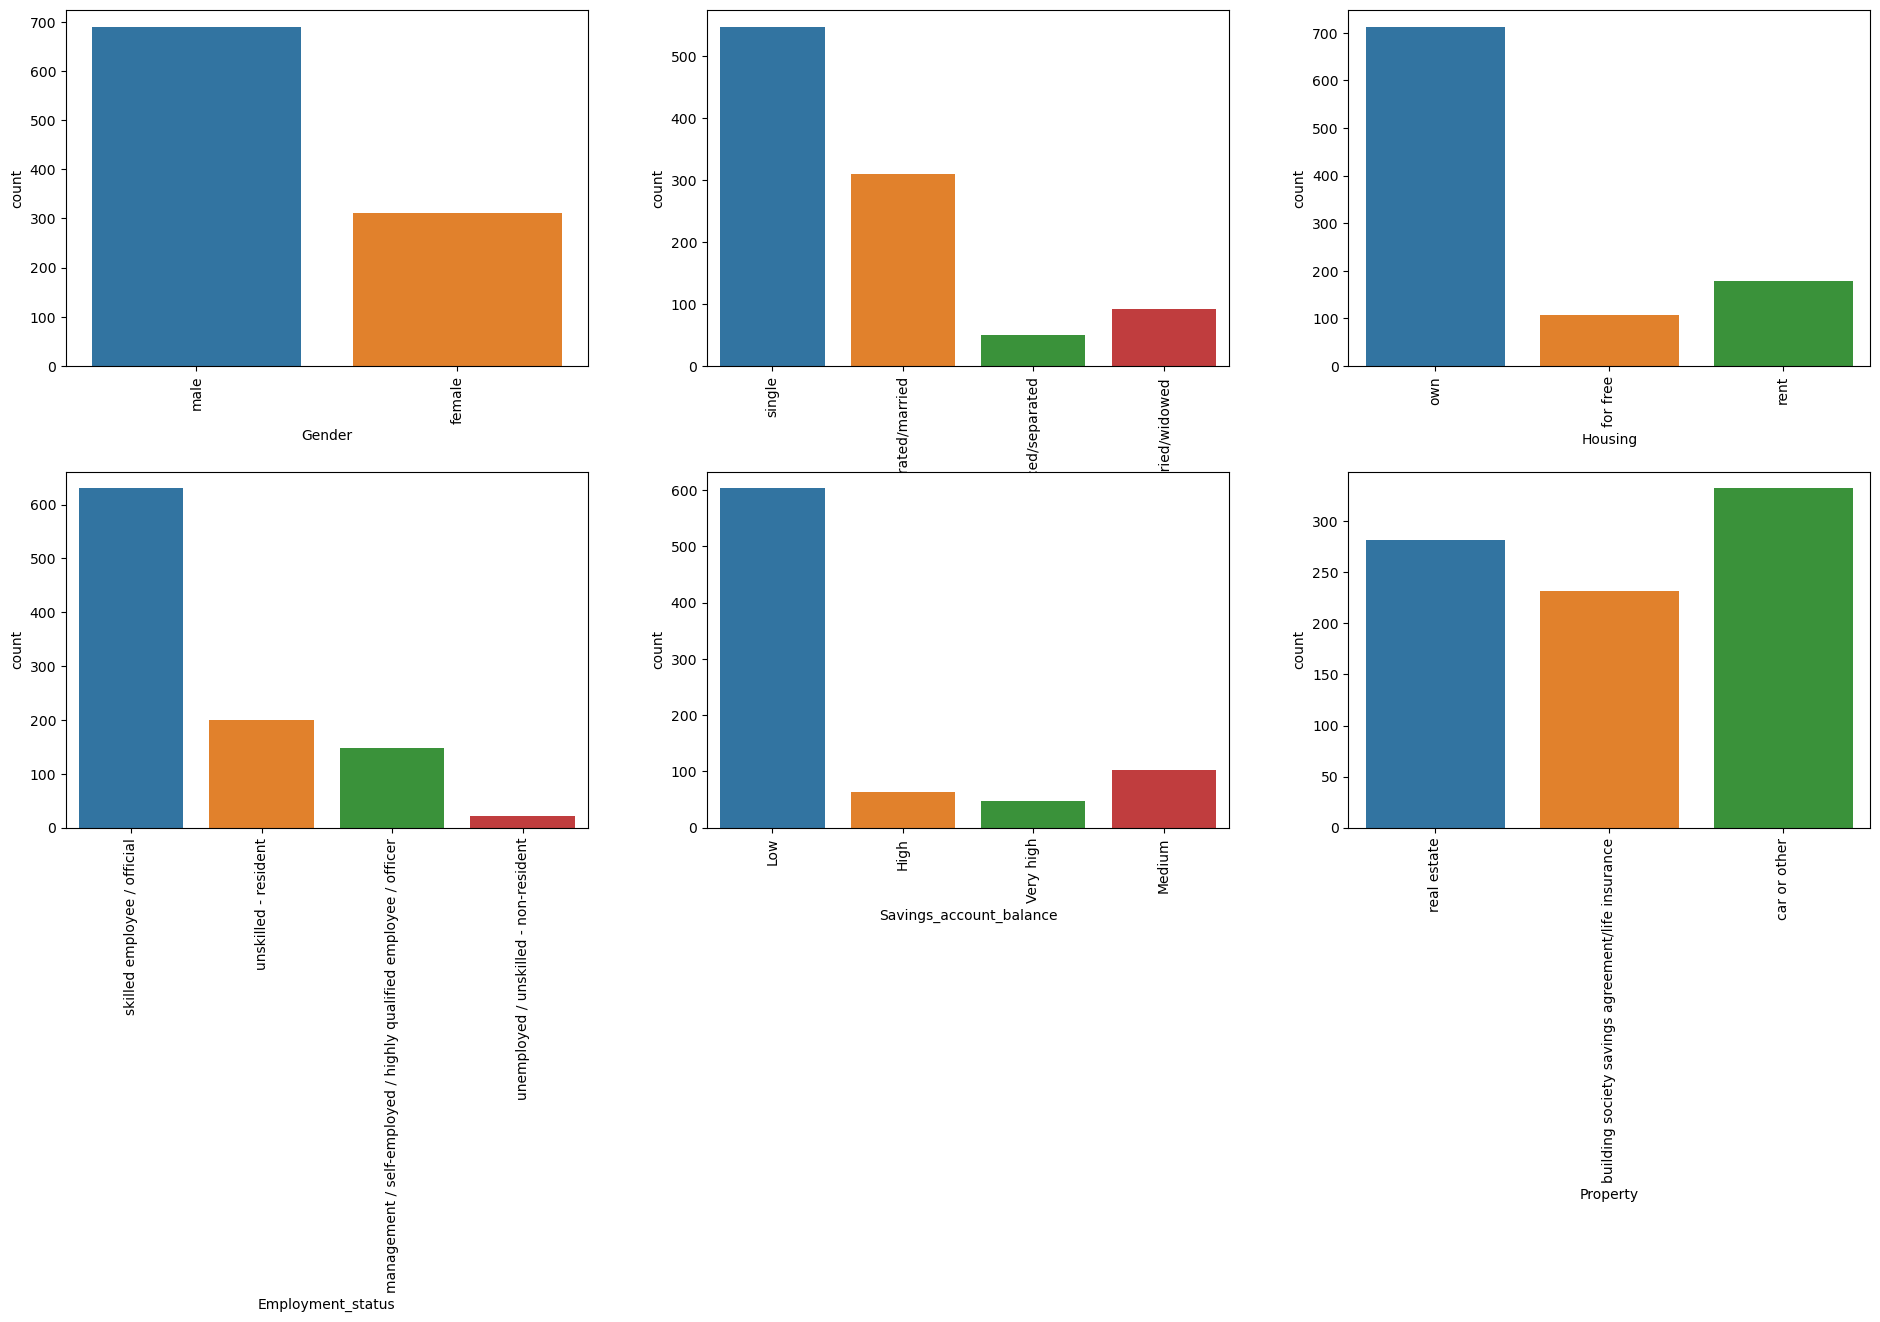

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax=plt.subplots(2,3,figsize=(20,10))
fig.tight_layout(pad=5.5)

for var, plot in zip(cat_cols,ax.flatten()):
    
    sns.countplot(x=data[var],ax=plot)
    
    for label in plot.get_xticklabels():
        label.set_rotation(90)

# Risk Analysis

In [ ]:
fig,ax=plt.subplots(2,3,figsize=(20,10))
plt.suptitle('RISK PLOTS')
fig.tight_layout(pad=5.5)

for var, plot in zip(cat_cols,ax.flatten()):
    
    sns.countplot(x=data[var],hue='high_risk_applicant',data=data,ax=plot)
    
    for label in plot.get_xticklabels():
        label.set_rotation(90)

In [ ]:
Risky=data[data['high_risk_applicant']== 0]
NotRisky=data[data['high_risk_applicant']== 1]

fig, ax = plt.subplots(1,3,figsize=(25,5))

sns.histplot(Risky['Principal_loan_amount'],label='High Risk',color='red',kde=True,ax=ax[0],stat='probability');
sns.histplot(NotRisky['Principal_loan_amount'],label='Low Risk',color='Green',kde=True,ax=ax[0],stat='probability');

sns.histplot(Risky['Number_of_existing_loans_at_this_bank'],label='High Risk',color='red',kde=True,ax=ax[1],stat='probability');
sns.histplot(NotRisky['Number_of_existing_loans_at_this_bank'],label='Low Risk',color='Green',kde=True,ax=ax[1],stat='probability');


sns.histplot(Risky['Months_loan_taken_for'],label='High Risk',color='red',kde=True,ax=ax[2],stat='probability');
sns.histplot(NotRisky['Months_loan_taken_for'],label='Low Risk',color='Green',kde=True,ax=ax[2],stat='probability');

#plt.title('Credit Amount')
plt.legend()
plt.show()

In [ ]:
sns.pairplot(data)

# Looking at the correlation of the data

In [29]:
data_extact = data['Principle_loan_amount', 'Savings_account_balance']
plt.figure(figsize=(14,12))
sns.heatmap(data_extact.astype(int).corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.show()

KeyError: ('Principle_loan_amount', 'Savings_account_balance')